# [Regression] : World Happiness Report up to 2020

<사용 데이터> 
1. 2015.csv
2. 2016.csv
3. 2017.csv
4. 2018.csv
5. 2019.csv
6. 2020.csv

<스키마>
- Country : 국가
- Region : 국가의 지역
- Happiness Rank : 행복지수 순위
- Happiness Score : 행복지수 점수
- GDP per capita : 1인당 GDP
- Hearlthy Life Expectancy : 건강 기대수명
- Social support : 사회적 지원
- Freedon to make life choices : 삶에 대한 선택의 자유
- Generosity : 관용
- Corruption Perception : 부정부패
- Dystopia + Residual : 그 외

- [source] : https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv
- [Citation] : Helliwell, John F., Richard Layard, Jeffrey Sachs, and Jan-Emmanuel De Neve, eds. 2020. World Happiness Report 2020. New York: Sustainable Development Solutions Network

------------------

# 1. 모듈 및 데이터 호출

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = dict()
df['2015'] = pd.read_csv('./data/2015.csv')
df['2016'] = pd.read_csv('./data/2016.csv')
df['2017'] = pd.read_csv('./data/2017.csv')
df['2018'] = pd.read_csv('./data/2018.csv')
df['2019'] = pd.read_csv('./data/2019.csv')
df['2020'] = pd.read_csv('./data/2020.csv')

In [91]:
df['2015']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


----------------------

# 2. 데이터 전처리

### 데이터 프레임 구성하기

In [92]:
for key in df :
    print(key, df[key].columns)

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [93]:
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom', 'generosity', 'trust','residual']

In [94]:
df['2015'].drop(['Region', 'Happiness Rank', 'Standard Error'], axis=1, inplace=True) #generosity, trust 반대
df['2016'].drop(['Region', 'Happiness Rank','Lower Confidence Interval', 
                 'Upper Confidence Interval'], axis=1, inplace=True) #generosity, trust 반대
df['2017'].drop(['Happiness.Rank','Whisker.high', 'Whisker.low'], axis=1, inplace=True)
df['2018'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음
df['2019'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음
df['2020'].drop(['Regional indicator', 'Standard error of ladder score', 
                 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 
                 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 
                 'Generosity','Perceptions of corruption', 'Ladder score in Dystopia'], 
                axis=1, inplace=True) 

In [95]:
df['2018'].head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


#### 2018년, 2019년 residual 칼럼 만들어주기

In [96]:
df['2018'].columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [97]:
df['2018']['residual'] = df['2018']['Score'] - df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)
df['2019']['residual'] = df['2019']['Score'] - df['2019'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

#### generosity, trust 순서 변경

In [98]:
df['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]

df['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]

In [99]:
for key in df :
    print(key, df[key].columns)

2015 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'residual'],
      dtype='object')
2019 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life 

In [100]:
for col_name in df :
    df[col_name].columns = cols

In [101]:
df['2015'].head(1)

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738


### 데이터프레임 합치기

In [102]:
df_all = pd.concat(df, axis=0)
df_all.index.names = ['year', 'rank']
df_all

country   score   economy    family    health  \
year rank                                                                   
2015 0                  Switzerland  7.5870  1.396510  1.349510  0.941430   
     1                      Iceland  7.5610  1.302320  1.402230  0.947840   
     2                      Denmark  7.5270  1.325480  1.360580  0.874640   
     3                       Norway  7.5220  1.459000  1.330950  0.885210   
     4                       Canada  7.4270  1.326290  1.322610  0.905630   
...                             ...     ...       ...       ...       ...   
2020 148   Central African Republic  3.4759  0.041072  0.000000  0.000000   
     149                     Rwanda  3.3123  0.343243  0.522876  0.572383   
     150                   Zimbabwe  3.2992  0.425564  1.047835  0.375038   
     151                South Sudan  2.8166  0.289083  0.553279  0.208809   
     152                Afghanistan  2.5669  0.300706  0.356434  0.266052   

            freedom  generosity     trust  residual  
year rank                                            
2015 0     0.665570    0.296780  0.419780  2.517380  
     1     0.628770    0.436300  0.141450  2.702010  
     2     0.649380    0.341390  0.483570  2.492040  
     3     0.669730    0.346990  0.365030  2.465310  
     4     0.632970    0.458110  0.329570  2.451760  
...             ...         ...       ...       ...  
2020 148   0.292814    0.253513  0.028265  2.860198  
     149   0.604088    0.235705  0.485542  0.548445  
     150   0.377405    0.151349  0.080929  0.841031  
     151   0.065609    0.209935  0.111157  1.378751  
     152   0.000000    0.135235  0.001226  1.507236  

[935 rows x 9 columns]

In [103]:
df_all.reset_index(inplace=True)
df_all['rank'] += 1
df_all.head()

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,2015,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,2015,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,2015,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,2015,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176


### pivot을 이용하여 데이터프레임 재구성하기

In [104]:
rank_table = df_all.pivot(index='country', columns='year', values='rank')
rank_table.sort_values('2020', inplace=True)
rank_table.head(20)

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0
Sweden,8.0,10.0,9.0,9.0,7.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0,8.0
Austria,13.0,12.0,13.0,12.0,10.0,9.0


# 시각화

## 년도별 순위 변화 시각화

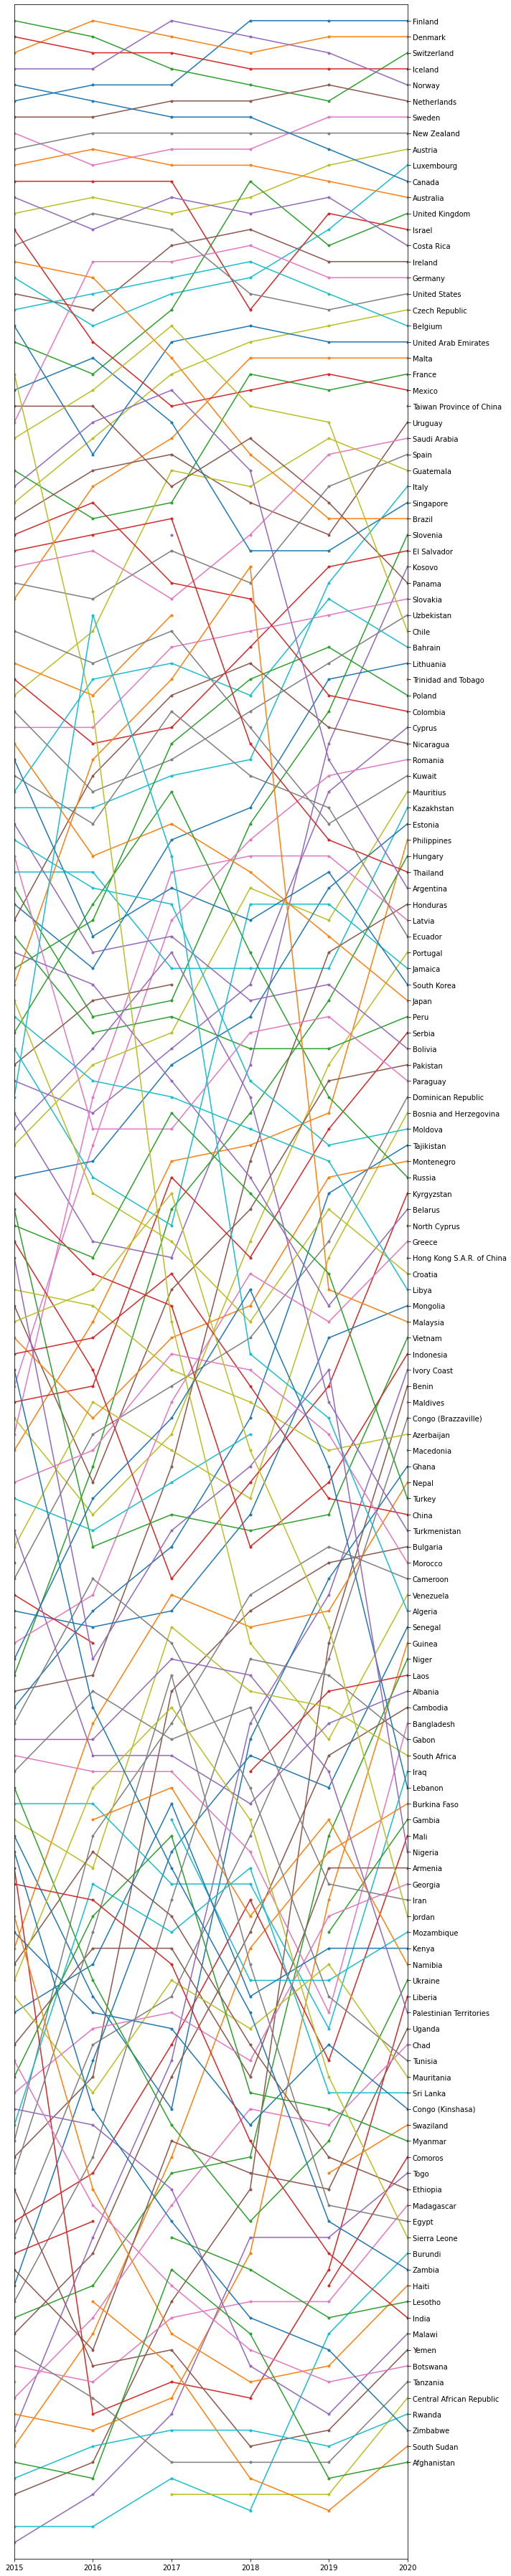

In [105]:
fig = plt.figure(figsize=(10,50))
rank_2020 = rank_table['2020'].dropna()

for c in rank_2020.index :
    t = rank_table.loc[c]
    plt.plot(t.index, t, '.-')
    
plt.xlim(['2015','2020'])
plt.ylim(0, rank_table.max().max()+1)
plt.yticks(rank_2020, rank_2020.index)   # 숫자, 내용 >> 먼저 숫자를 넣어주면 해당 숫자에 내용 출력
ax = plt.gca()    # get_curren_axis : 캔버스를 받아오기
ax.invert_yaxis()
ax.yaxis.tick_right()
plt.tight_layout()
plt.show()

## Column간의 상관관계 파악

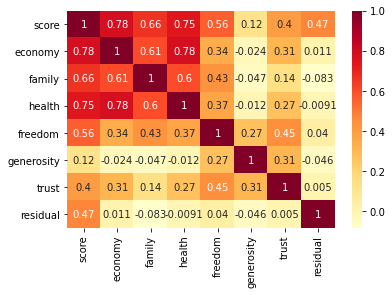

In [106]:
sns.heatmap(df_all.drop('rank', axis=1).corr(), cmap='YlOrRd', annot=True)

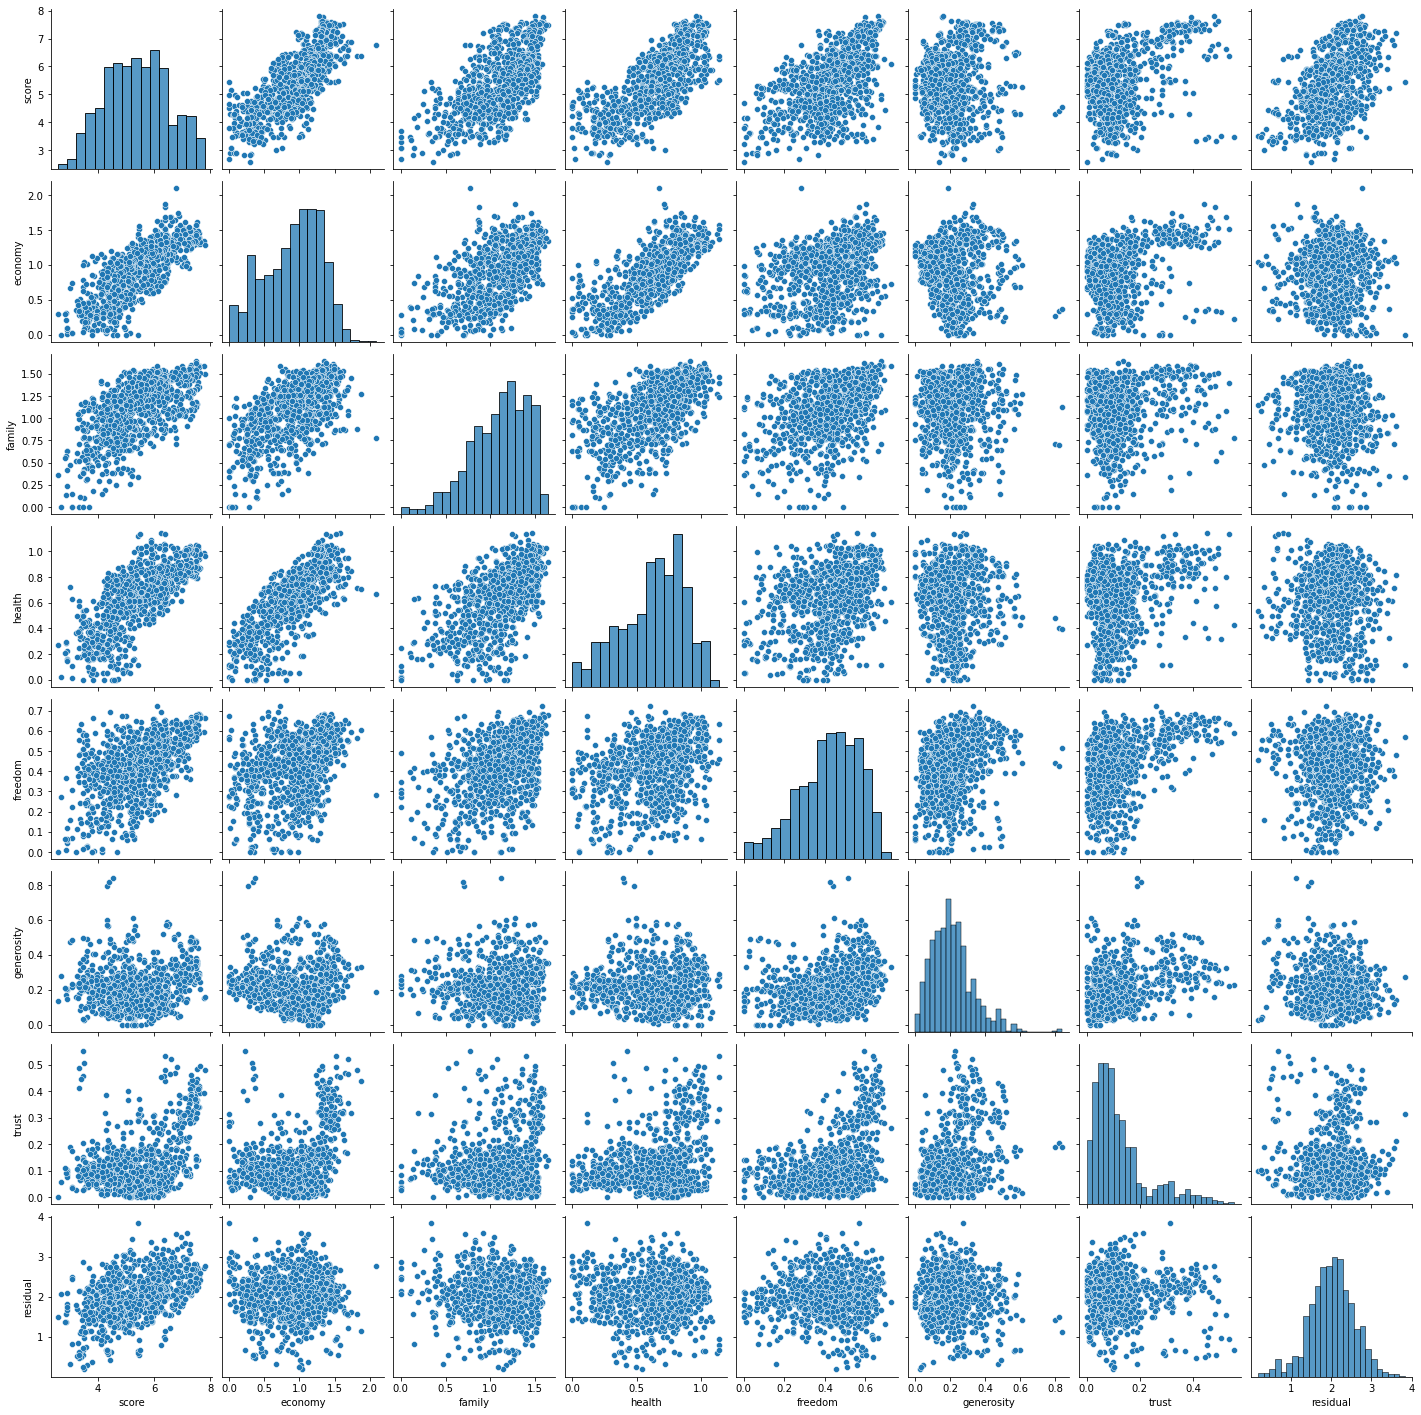

In [107]:
sns.pairplot(df_all.drop('rank', axis=1))

---------------

# 모델링

### 모델의 입력과 출력 정의하기

In [130]:
col_input_list = ['economy', 'family', 'health', 'freedom', 'generosity', 'trust']
col_out = 'score'

### 학습데이터와 테스트데이터 분리하기

In [131]:
# 2015년 ~ 2019년도 데이터를 학습 데이터로, 2020년도 데이터를 테스트 데이터로 분리하기
df_train = df_all[df_all['year'] != '2020']
df_test = df_all[df_all['year'] == '2020']

X_train = df_train[col_input_list]
y_train = df_train[col_out]
X_test = df_test[col_input_list]
y_test = df_test[col_out]

### StandardScaler를 이용해 학습 데이터 표준화하기

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()
scaler.fit(X_train)

X_norm = scaler.transform(X_train)
X_train = pd.DataFrame(X_norm, index=X_train.index, columns=X_train.columns)

X_norm = scaler.transform(X_test)
X_test = pd.DataFrame(X_norm, index=X_test.index, columns=X_test.columns)

## Linear Regression 학습하기

In [134]:
from sklearn.linear_model import LinearRegression

In [138]:
X_train.fillna(0, inplace=True)

In [139]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

### 모델 학습 평가하기

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [141]:
pred = model_lr.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.4411766043832983
0.5666831855845988


## XGBoost Regression 학습하기

In [142]:
from xgboost import XGBRegressor

In [143]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [144]:
pred = model_xgb.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.40956910915901373
0.521788101095574


# 모델 학습 결과 심화 분석하기

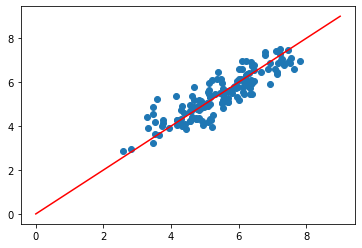

In [145]:
plt.scatter(x=y_test, y=pred)
plt.plot([0,9], [0,9], 'r-')
plt.show()

### LinearRegression 모델의 Coefficient 시각화하기

<BarContainer object of 6 artists>

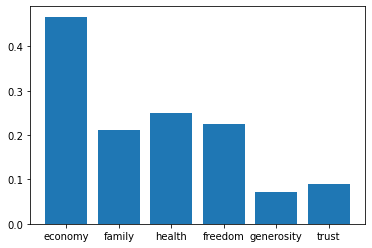

In [146]:
plt.bar(X_train.columns, model_lr.coef_)

### XGBoost 모델의 Feature Importance 시각화하기

<BarContainer object of 6 artists>

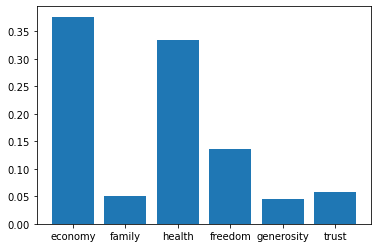

In [148]:
plt.bar(X_train.columns, model_xgb.feature_importances_)